<a href="https://colab.research.google.com/github/LeticiaHu/Customer_Segmentation/blob/main/Project3_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Unsupervised Learning AI Agent: Customer Segmentation on Online Retail

This project applies unsupervised machine learning techniques to the Online Retail dataset to identify distinct customer groups based on purchasing behavior. By using clustering algorithms such as K-Means and hierarchical clustering, the AI agent segments customers into meaningful categories.

These insights can help businesses:

🎯 Personalize marketing strategies

📦 Improve product recommendations

💰 Increase customer retention and sales efficiency

---

**Author:** Leticia Huang  
**Date:** August 13th 2025  
**Institution:**  CIS 9660 - Data Mining for Business Analytics  
**Instructor:** Prof. Mr. Avinash Jairam

---

## 📦 Dataset Overview

**Source:** https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset


**Business:** Online Sales Dataset

**Time Period:** January 2020 - May 2025

**Size:** 49,782 transactions  

## 📚 Acknowledgements

- Portions of the code used in data preprocessing and model setup were adapted from instructional materials provided by **Prof. Mr. Avinash Jairam** as part of the CIS 9660 - Data Mining for Business Analytics course.

- All final modeling decisions, analysis, conclusions, and interpretations are my own.


## 1. Environment Setup and Library Installation <a id='setup'></a>



In [ ]:
# Install required libraries (run this cell if using Google Colab)
!pip install pandas numpy matplotlib seaborn scikit-learn mlxtend plotly -q

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# For clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# For association rules
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# For visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Data Loading and Exploration <a id='data-loading'></a>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
df = pd.read_csv("/content/drive/MyDrive/online_sales_dataset.csv")
print(f"Data loaded successfully! Shape: {df.shape}")
# Display basic information
print("\nDataset Overview:")
print(df.info())

Data loaded successfully! Shape: (49782, 17)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  Wareho

In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [ ]:
print(df.describe())
print(f'The dataset show rows with negative quantity and prices that needs to be adressed')

           InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  44804.000000  49782.000000   
mean   550681.239946     22.372343     47.537862  55032.871775      0.275748   
std    260703.009944     17.917774     33.479510  25913.660157      0.230077   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    324543.000000     11.000000     23.592500  32750.750000      0.130000   
50%    552244.000000     23.000000     48.920000  55165.000000      0.260000   
75%    776364.000000     37.000000     74.610000  77306.250000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      1.999764   

       ShippingCost  
count  47293.000000  
mean      17.494529  
std        7.220557  
min        5.000000  
25%       11.220000  
50%       17.500000  
75%       23.720000  
max       30.000000  
The dataset show rows with negative quantity and prices that needs to be adressed

In [ ]:
# Basic statistics
print("\nBasic Statistics:")
print(f"Total transactions: {len(df)}")
print(f"Unique customers: {df['CustomerID'].nunique()}")
print(f"Unique products: {df['StockCode'].nunique()}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")


Basic Statistics:
Total transactions: 49782
Unique customers: 35389
Unique products: 1000
Date range: 2020-01-01 00:00 to 2025-09-05 05:00


## **3. Data Preprocessing and Feature Engineering**

### **Data Cleaning**
Before performing any analysis, the dataset must be prepared to ensure accuracy and reliability.

MISSING VALUES ANALYSIS
                   Missing Count  Percentage
CustomerID                  4978    9.999598
ShippingCost                2489    4.999799
WarehouseLocation           3485    7.000522

Total missing values: 10952
Percentage of missing data: 22.00%
The dataset shows 10952 rows with missing CustomerID that will be removed to ensure reliable segmentation 


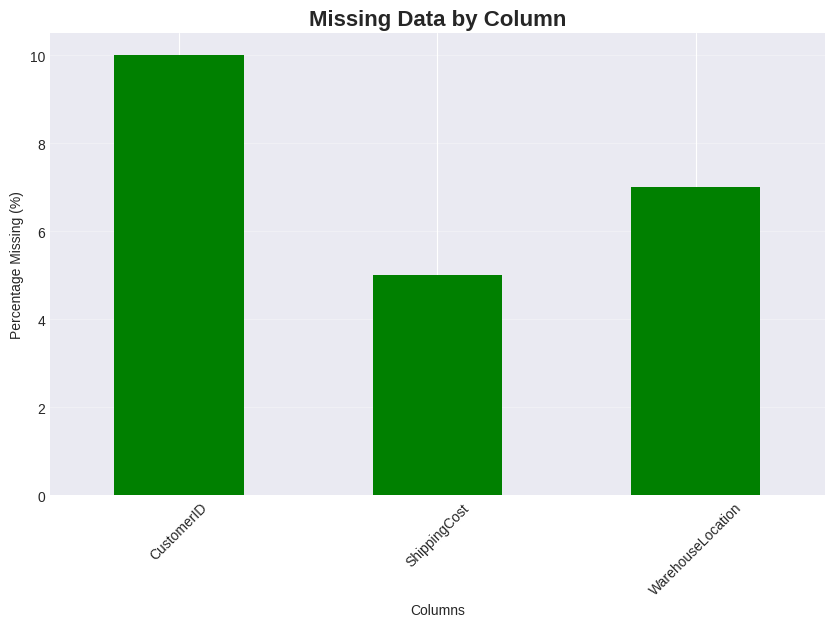

In [ ]:
# Check for columns with missing values before Cleanup
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nTotal missing values: {missing_data.sum()}")
print(f"Percentage of missing data: {(missing_data.sum() / len(df)) * 100:.2f}%")
print(f"The dataset shows {(missing_data.sum())} rows with missing CustomerID that will be removed to ensure reliable segmentation ")

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_df[missing_df['Missing Count'] > 0]['Percentage'].plot(kind='bar', color='green')
plt.title('Missing Data by Column', fontsize=16, fontweight='bold')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
# Data cleaning
print(f"Original data shape: {df.shape}")

# Remove rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])
print(f"After removing missing CustomerIDs: {df_clean.shape}")

# Remove negative quantities (returns)
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"After removing returns: {df_clean.shape}")

# Remove zero or negative prices
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f"After removing invalid prices: {df_clean.shape}")

# Calculate total price for each line item
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert CustomerID to integer
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

print(f"\nFinal cleaned data shape: {df_clean.shape}")
print(f"Data retention rate: {len(df_clean)/len(df)*100:.1f}%")

Original data shape: (49782, 17)
After removing missing CustomerIDs: (44804, 17)
After removing returns: (44804, 17)
After removing invalid prices: (44804, 17)

Final cleaned data shape: (44804, 18)
Data retention rate: 90.0%


In [ ]:
# Verifying if all NUll values were removed
print(df_clean.isnull().sum())

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
TotalPrice           0
dtype: int64


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          44804 non-null  int64  
 1   StockCode          44804 non-null  object 
 2   Description        44804 non-null  object 
 3   Quantity           44804 non-null  int64  
 4   InvoiceDate        44804 non-null  object 
 5   UnitPrice          44804 non-null  float64
 6   CustomerID         44804 non-null  int64  
 7   Country            44804 non-null  object 
 8   Discount           44804 non-null  float64
 9   PaymentMethod      44804 non-null  object 
 10  ShippingCost       44804 non-null  float64
 11  Category           44804 non-null  object 
 12  SalesChannel       44804 non-null  object 
 13  ReturnStatus       44804 non-null  object 
 14  ShipmentProvider   44804 non-null  object 
 15  WarehouseLocation  44804 non-null  object 
 16  OrderPriority      44804 no

## **RFM Analysis**
- RFM is a customer analytics framework that scores buyers by how recently they purchased, how often they buy, and how much they spend.


In [ ]:
# Calculate RFM metrics
# Define the reference date (latest date in dataset + 1 day)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
reference_date = df_clean['InvoiceDate'].max() + timedelta(days=1)
print(f"Reference date for recency calculation: {reference_date}")

# Create RFM table
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (number of unique invoices)
    'TotalPrice': 'sum'  # Monetary value
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset index
rfm = rfm.reset_index()

print("\nRFM Table Summary:")
print(rfm.describe())

# Display sample RFM data
print("\nSample RFM data:")
rfm.head(10)

Reference date for recency calculation: 2025-09-06 05:00:00

RFM Table Summary:
         CustomerID       Recency     Frequency      Monetary
count  35389.000000  35389.000000  35389.000000  35389.000000
mean   54982.564413    953.646726      1.266043   1593.753569
std    25939.914880    594.577509      0.533394   1399.726976
min    10001.000000      1.000000      1.000000      1.010000
25%    32638.000000    432.000000      1.000000    473.100000
50%    55054.000000    912.000000      1.000000   1213.460000
75%    77290.000000   1454.000000      1.000000   2383.040000
max    99998.000000   2075.000000      6.000000  11806.360000

Sample RFM data:


,CustomerID,Recency,Frequency,Monetary
0,10001,742,1,1516.22
1,10003,1842,1,377.05
2,10005,251,2,2527.15
3,10008,145,1,62.60
4,10009,1826,1,827.84
5,10010,693,2,3386.28
6,10011,853,1,746.58
7,10012,1436,1,822.90
8,10017,92,1,2935.20
9,10018,655,1,1401.12


In [ ]:
# Add additional customer features
# Average order value
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']

# Number of unique products purchased
products_per_customer = df_clean.groupby('CustomerID')['StockCode'].nunique().reset_index()
products_per_customer.columns = ['CustomerID', 'UniqueProducts']
rfm = rfm.merge(products_per_customer, on='CustomerID', how='left') # Use how='left' to keep all customers in rfm

# Product diversity (unique products / total transactions)
transactions_per_customer = df_clean.groupby('CustomerID').size().reset_index(name='TotalTransactions')
rfm = rfm.merge(transactions_per_customer, on='CustomerID', how='left') # Use how='left' to keep all customers in rfm
rfm['ProductDiversity'] = rfm['UniqueProducts'] / rfm['TotalTransactions']

top_prod = (df_clean.groupby(['CustomerID','Description'])['Quantity'].sum()
            .reset_index().sort_values(['CustomerID','Quantity'], ascending=[True, False])
            .drop_duplicates('CustomerID')[['CustomerID','Description']]
            .rename(columns={'Description':'TopProduct'}))

rfm = rfm.merge(top_prod, on='CustomerID', how='left')

# Looking for seasonality
# Define a function to map month to season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df_clean['Season'] = df_clean['InvoiceDate'].dt.month.map(get_season)
top_season = (df_clean.groupby('CustomerID')['Season']
              .agg(lambda x: x.mode()[0])  # most common season
              .reset_index(name='PurchaseSeasonality'))
rfm = rfm.merge(top_season, on='CustomerID', how='left')


# TopCategory: most purchased category per customer
top_category = (df_clean.groupby(['CustomerID', 'Category'])['Quantity'].sum()
                .reset_index()
                .sort_values(['CustomerID', 'Quantity'], ascending=[True, False])
                .drop_duplicates('CustomerID')[['CustomerID', 'Category']]
                .rename(columns={'Category': 'TopCategory'}))
rfm = rfm.merge(top_category, on='CustomerID', how='left')

# AvgItemPrice: average unit price across all items bought
avg_item_price = (df_clean.groupby('CustomerID')
                  .apply(lambda x: (x['TotalPrice'].sum() / x['Quantity'].sum()))
                  .reset_index(name='AvgItemPrice'))
rfm = rfm.merge(avg_item_price, on='CustomerID', how='left')

# ReturnsRate: percentage of transactions returned
returns_rate = (df_clean.groupby('CustomerID')['ReturnStatus']
                .apply(lambda x: (x == 'Returned').mean())
                .reset_index(name='ReturnsRate'))
rfm = rfm.merge(returns_rate, on='CustomerID', how='left')

# Add DiscountUsage
discount_usage = df_clean.groupby('CustomerID')['Discount'].mean().reset_index(name='DiscountUsage')
rfm = rfm.merge(discount_usage, on='CustomerID', how='left')

# Add CategoryDiversity (Number of unique categories per customer)
category_diversity = df_clean.groupby('CustomerID')['Category'].nunique().reset_index(name='CategoryDiversity')
rfm = rfm.merge(category_diversity, on='CustomerID', how='left')


print("\nEnhanced customer features:")
print(rfm.columns.tolist())
print("\nSample enhanced data:")
rfm.head()

/tmp/ipython-input-2428608682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['TotalPrice'].sum() / x['Quantity'].sum()))



Enhanced customer features:
['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'UniqueProducts', 'TotalTransactions', 'ProductDiversity', 'TopProduct', 'PurchaseSeasonality', 'TopCategory', 'AvgItemPrice', 'ReturnsRate', 'DiscountUsage', 'CategoryDiversity']

Sample enhanced data:


,CustomerID,Recency,Frequency,Monetary,AvgOrderValue,UniqueProducts,TotalTransactions,ProductDiversity,TopProduct,PurchaseSeasonality,TopCategory,AvgItemPrice,ReturnsRate,DiscountUsage,CategoryDiversity
0,10001,742,1,1516.22,1516.220,1,1,1.0,Office Chair,Summer,Accessories,32.260000,0.0,0.03,1
1,10003,1842,1,377.05,377.050,1,1,1.0,USB Cable,Summer,Furniture,75.410000,0.0,0.03,1
2,10005,251,2,2527.15,1263.575,2,2,1.0,Blue Pen,Winter,Apparel,40.113492,0.0,0.10,2
3,10008,145,1,62.60,62.600,1,1,1.0,T-shirt,Spring,Electronics,12.520000,0.0,0.22,1
4,10009,1826,1,827.84,827.840,1,1,1.0,Office Chair,Autumn,Electronics,25.870000,0.0,0.44,1


### Visualize RFM Distributions

Understanding the distribution of our features helps identify outliers and patterns.

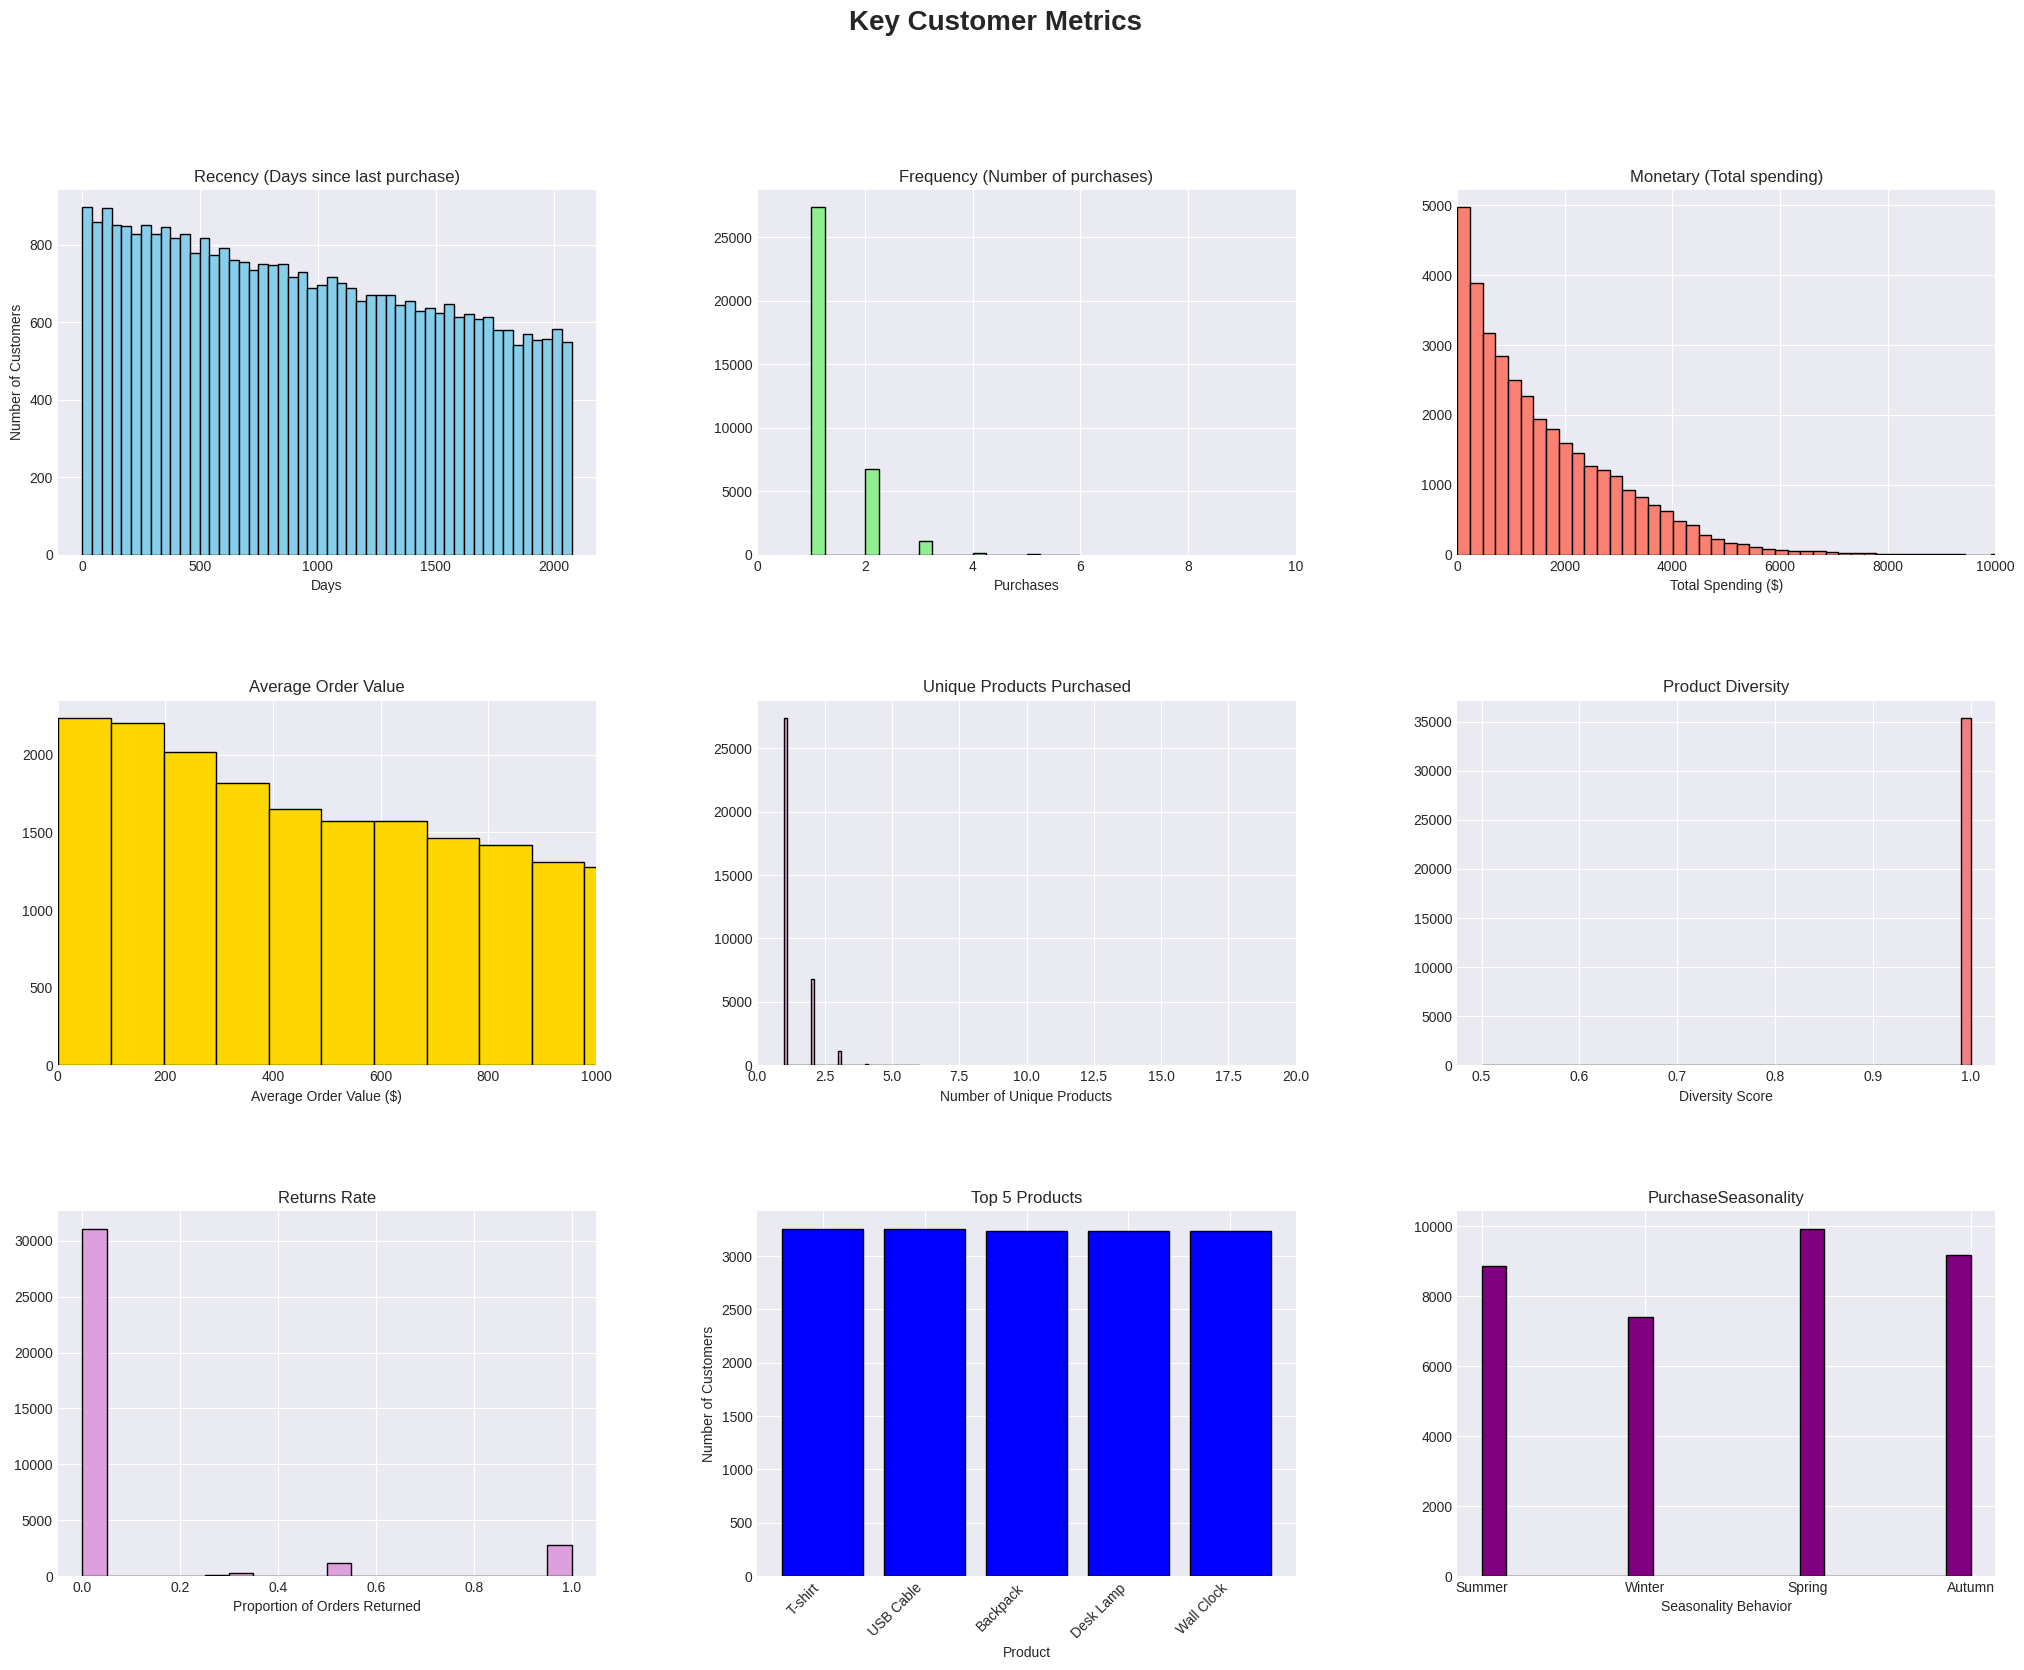

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25, 18))  # Increase height from 10 → 18
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Key Customer Metrics', fontsize=20, fontweight='bold')

# Recency
axes[0, 0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Recency (Days since last purchase)')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Number of Customers')

# Frequency
axes[0, 1].hist(rfm['Frequency'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Frequency (Number of purchases)')
axes[0, 1].set_xlabel('Purchases')
axes[0, 1].set_xlim(0, 10)

# Monetary
axes[0, 2].hist(rfm['Monetary'], bins=50, color='salmon', edgecolor='black')
axes[0, 2].set_title('Monetary (Total spending)')
axes[0, 2].set_xlabel('Total Spending ($)')
axes[0, 2].set_xlim(0, 10000)


# Average Order Value
axes[1, 0].hist(rfm['AvgOrderValue'], bins=50, color='gold', edgecolor='black')
axes[1, 0].set_title('Average Order Value')
axes[1, 0].set_xlabel('Average Order Value ($)')
axes[1, 0].set_xlim(0, 1000)

# Unique Products
axes[1, 1].hist(rfm['UniqueProducts'], bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('Unique Products Purchased')
axes[1, 1].set_xlabel('Number of Unique Products')
axes[1, 1].set_xlim(0, 10)

# Product Diversity
axes[1, 2].hist(rfm['ProductDiversity'], bins=50, color='lightcoral', edgecolor='black')
axes[1, 2].set_title('Product Diversity')
axes[1, 2].set_xlabel('Diversity Score')
axes[1, 1].set_xlim(0, 20)

# Returns Rate
axes[2, 0].hist(rfm['ReturnsRate'], bins=20, color='plum', edgecolor='black')
axes[2, 0].set_title('Returns Rate')
axes[2, 0].set_xlabel('Proportion of Orders Returned')


# Top Product
top5_products = (rfm['TopProduct']
                 .dropna()
                 .value_counts()
                 .head(5))

# Plot as a bar chart instead of hist()
axes[2, 1].bar(top5_products.index, top5_products.values, color='Blue', edgecolor='black')
axes[2, 1].set_title('Top 5 Products')
axes[2, 1].set_xlabel('Product')
axes[2, 1].set_ylabel('Number of Customers')

# Rotate x-axis labels for readability
axes[2, 1].set_xticklabels(top5_products.index, rotation=45, ha='right')

# Seasonality
axes[2, 2].hist(rfm['PurchaseSeasonality'], bins=20, color='purple', edgecolor='black')
axes[2, 2].set_title('PurchaseSeasonality')
axes[2, 2].set_xlabel('Seasonality Behavior')
plt.show()


## 4. Customer Segmentation with K-Means Clustering

### Feature Scaling


In [ ]:
# Select features for clustering
clustering_features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue',
                   'UniqueProducts', 'TotalTransactions',
                   'ProductDiversity', 'AvgItemPrice', 'ReturnsRate',
                   'DiscountUsage', 'CategoryDiversity']
X = rfm[clustering_features]

# Handle outliers using IQR method
# Outliers can significantly affect clustering results
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
print("Removing outliers...")
mask = ~((X < lower_bound) | (X > upper_bound)).any(axis=1)
X_clean = X[mask]
rfm_clean = rfm[mask]

print(f"Original data: {len(X)} customers")
print(f"After outlier removal: {len(X_clean)} customers")
print(f"Outliers removed: {len(X) - len(X_clean)} ({(len(X) - len(X_clean))/len(X)*100:.1f}%)")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("\nFeatures have been scaled to have mean=0 and std=1")

Removing outliers...
Original data: 35389 customers
After outlier removal: 24117 customers
Outliers removed: 11272 (31.9%)

Features have been scaled to have mean=0 and std=1


### Finding Optimal Number of Clusters

**Elbow Method**: Plots the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point where the rate of decrease sharply levels off suggests the optimal number of clusters.

**Silhouette Score**: Measures how similar each point is to its own cluster compared to other clusters. Ranges from -1 to 1, where higher is better.

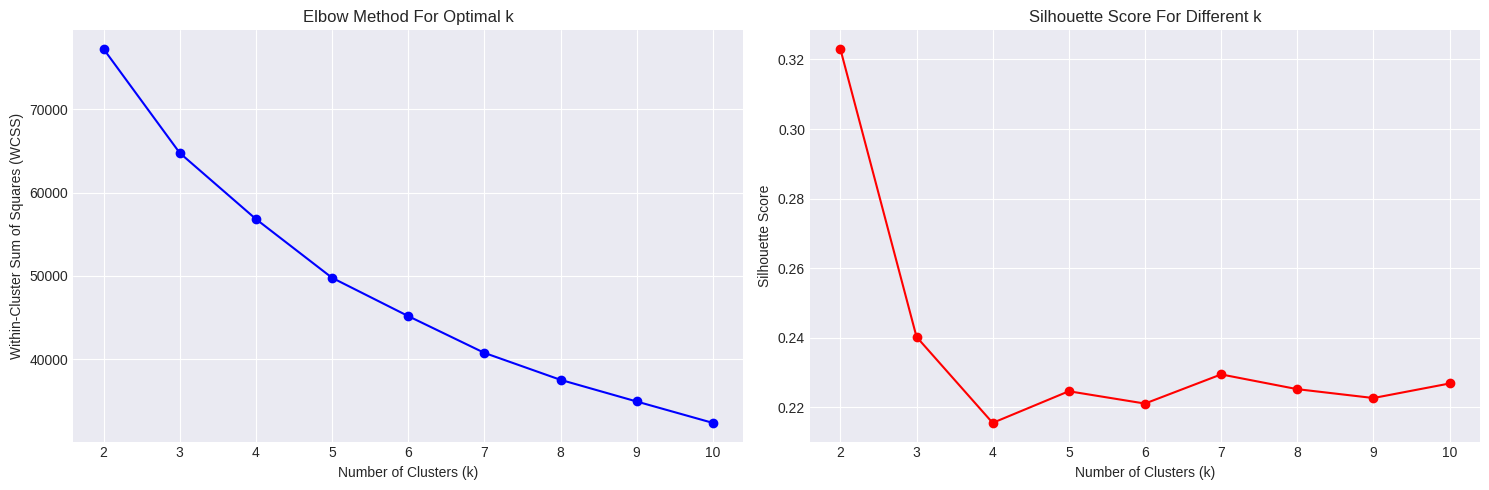


Optimal number of clusters based on Silhouette Score: 2
Silhouette Score for k=2: 0.323


In [ ]:
# Elbow method to find optimal k
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(K, wcss, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

# Silhouette scores
ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score For Different k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Silhouette Score for k={optimal_k}: {max(silhouette_scores):.3f}")

### Apply K-Means Clustering

In [ ]:
# Apply K-Means with optimal k
optimal_k = 2 # You can adjust based on the plots above
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
rfm_clean['Cluster'] = clusters

# Calculate cluster centers in original scale by grouping rfm_clean
cluster_centers_df = rfm_clean.groupby('Cluster')[clustering_features].mean().round(2).reset_index()

print("Cluster Centers (Original Scale):")
print(cluster_centers_df.round(2))

# Cluster sizes
print("\nCluster Sizes:")
cluster_sizes = rfm_clean['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size/len(rfm_clean)*100:.1f}%)")

Cluster Centers (Original Scale):
   Cluster  Recency  Frequency  Monetary  AvgOrderValue  UniqueProducts  \
0        0  1035.21        1.0   2334.99        2334.99             1.0   
1        1  1037.91        1.0    573.40         573.40             1.0   

   TotalTransactions  ProductDiversity  AvgItemPrice  ReturnsRate  \
0                1.0               1.0         73.69          0.0   
1                1.0               1.0         36.58          0.0   

   DiscountUsage  CategoryDiversity  
0           0.25                1.0  
1           0.25                1.0  

Cluster Sizes:
Cluster 0: 8478 customers (35.2%)
Cluster 1: 15639 customers (64.8%)


In [25]:
# Apply K-Means with optimal k
optimal_k = 2 # You can adjust based on the plots above
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
rfm_clean['Cluster'] = clusters

# Calculate cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=clustering_features)
cluster_centers_df['Cluster'] = range(optimal_k)

print("Cluster Centers (Original Scale):")
print(cluster_centers_df.round(2))

# Cluster sizes
print("\nCluster Sizes:")
cluster_sizes = rfm_clean['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size/len(rfm_clean)*100:.1f}%)")

Cluster Centers (Original Scale):
   Recency  Frequency  Monetary  AvgOrderValue  UniqueProducts  \
0  1035.31        1.0   2333.90        2333.90             1.0   
1  1037.85        1.0    572.86         572.86             1.0   

   TotalTransactions  ProductDiversity  AvgItemPrice  ReturnsRate  \
0                1.0               1.0         73.68          0.0   
1                1.0               1.0         36.57          0.0   

   DiscountUsage  CategoryDiversity  Cluster  
0           0.25                1.0        0  
1           0.25                1.0        1  

Cluster Sizes:
Cluster 0: 8478 customers (35.2%)
Cluster 1: 15639 customers (64.8%)


### Visualize Clusters

- Using PCA to find the directions of maximum variance in the data


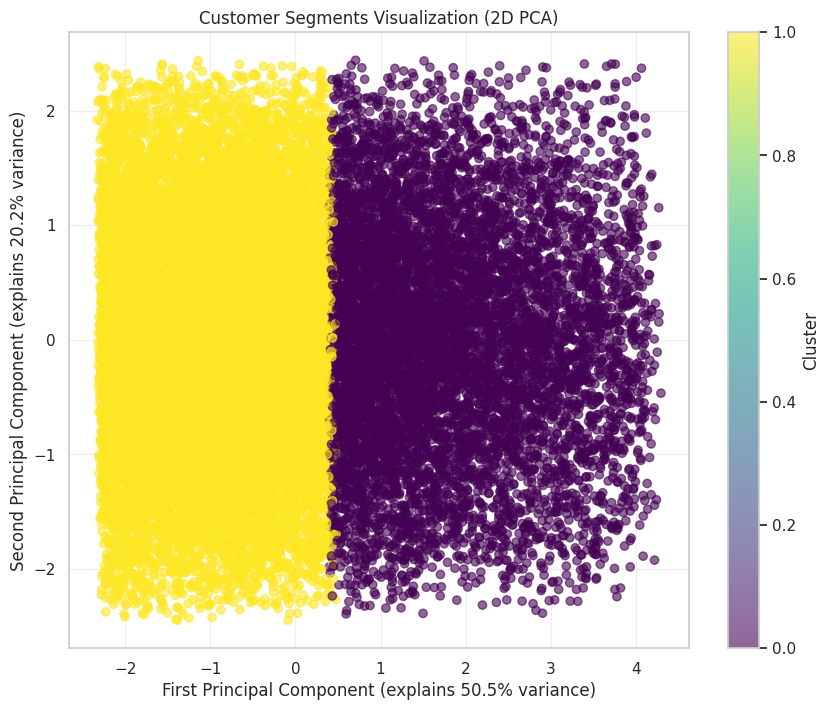

Total variance explained by 2 components: 70.7%


In [48]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments Visualization (2D PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.1%}")

### Analyze Cluster Characteristics

Average Values by Cluster:
         Recency  Frequency  Monetary  AvgOrderValue  UniqueProducts  \
Cluster                                                                
0        1035.21        1.0   2334.99        2334.99             1.0   
1        1037.91        1.0    573.40         573.40             1.0   

         TotalTransactions  ProductDiversity  AvgItemPrice  ReturnsRate  \
Cluster                                                                   
0                      1.0               1.0         73.69          0.0   
1                      1.0               1.0         36.58          0.0   

         DiscountUsage  CategoryDiversity  
Cluster                                    
0                 0.25                1.0  
1                 0.25                1.0  


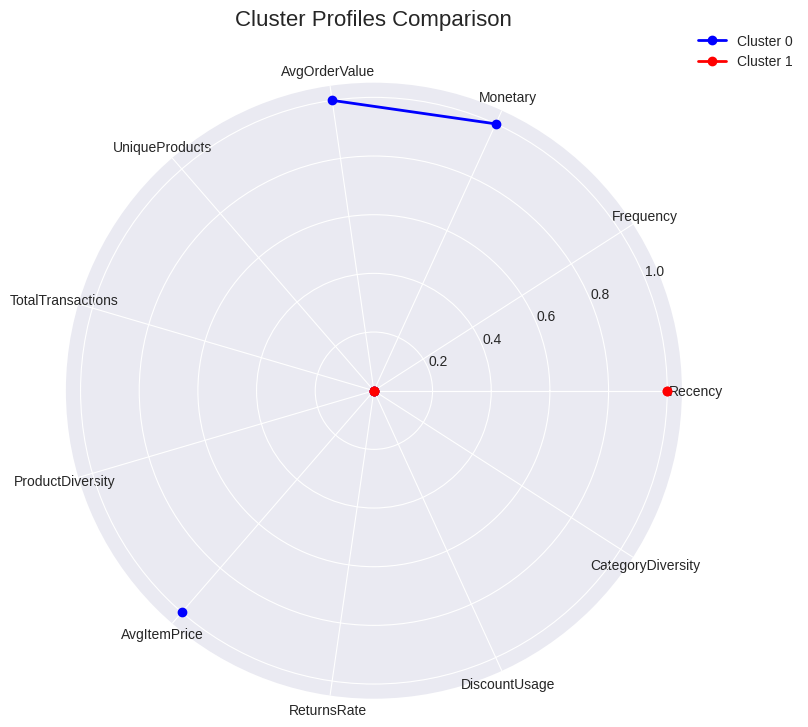

In [ ]:
# Calculate cluster profiles
cluster_profiles = rfm_clean.groupby('Cluster')[clustering_features].mean().round(2)
print("Average Values by Cluster:")
print(cluster_profiles)

# Create radar chart for cluster comparison
from math import pi

# Normalize cluster profiles for radar chart
cluster_profiles_normalized = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Set up radar chart
categories = clustering_features
fig = plt.figure(figsize=(12, 8))

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the plot
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories)

# Plot each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for idx, row in cluster_profiles_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {idx}', color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Cluster Profiles Comparison', size=16, y=1.08)
plt.show()

### Create Customer Personas

Based on the cluster characteristics, we'll create business-friendly personas for each segment.

In [ ]:
# Define customer personas based on cluster characteristics
def create_persona(cluster_data):
    # Ensure the cluster_data Series has the expected metrics
    expected_metrics = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'UniqueProducts',
                        'TotalTransactions', 'ProductDiversity', 'AvgItemPrice', 'ReturnsRate',
                        'DiscountUsage', 'CategoryDiversity']

    # Check if all expected metrics are in the cluster_data index
    if not all(metric in cluster_data.index for metric in expected_metrics):
        # Handle cases where some expected metrics might be missing (e.g., due to outlier removal)
        # For now, we will proceed with the available metrics
        pass

    recency = cluster_data.get('Recency', 0) # Use .get() with a default value
    frequency = cluster_data.get('Frequency', 0)
    monetary = cluster_data.get('Monetary', 0)
    avg_order = cluster_data.get('AvgOrderValue', 0)
    products = cluster_data.get('UniqueProducts', 0)
    total_txn = cluster_data.get('TotalTransactions', 0)
    product_diversity = cluster_data.get('ProductDiversity', 0)
    avg_item_price = cluster_data.get('AvgItemPrice', 0)
    returns_rate = cluster_data.get('ReturnsRate', 0)
    discount_usage = cluster_data.get('DiscountUsage', 0)
    category_diversity = cluster_data.get('CategoryDiversity', 0)


    # Refine persona definitions based on the currently available metrics
    # These definitions are simplified and can be further customized
    if recency < cluster_profiles['Recency'].quantile(0.25) and \
       monetary > cluster_profiles['Monetary'].quantile(0.75):
        return "High-Value, Recent Buyers", "Customers who have purchased recently and spent a significant amount."

    elif frequency > cluster_profiles['Frequency'].mean() and \
         product_diversity > cluster_profiles['ProductDiversity'].mean():
         return "Engaged, Diverse Shoppers", "Customers who purchase often and explore various products."

    elif recency > cluster_profiles['Recency'].quantile(0.75) and \
         monetary < cluster_profiles['Monetary'].quantile(0.25):
        return "At Risk, Low Engagement", "Customers who haven't purchased recently and have low spending."

    elif monetary > cluster_profiles['Monetary'].quantile(0.75):
        return "High Spenders", "Customers who spend a lot per transaction."

    else:
        return "Potential Loyalists", "Customers showing some engagement, with potential for growth."


# Create personas for each cluster
personas = {}
for idx, row in cluster_profiles.iterrows():
    # Select only the clustering features that exist in the cluster_profiles index
    persona_metrics = row[row.index.intersection(clustering_features)]

    name, description = create_persona(persona_metrics)
    personas[idx] = {
        'name': name,
        'description': description,
        'size': cluster_sizes[idx],
        'metrics': persona_metrics.to_dict()
    }

# Display personas
print("CUSTOMER PERSONAS BY CLUSTER\n" + "="*50)
for cluster_id, persona in personas.items():
    print(f"\nCluster {cluster_id}: {persona['name']}")
    print(f"Description: {persona['description']}")
    print(f"Size: {persona['size']} customers")
    print("Key Metrics:")
    # Only print metrics that are actually present
    for metric in persona_metrics.index:
         print(f"  - {metric}: {persona['metrics'].get(metric, 'N/A'):.2f}") # Use .get for safety

CUSTOMER PERSONAS BY CLUSTER

Cluster 0: High-Value, Recent Buyers
Description: Customers who have purchased recently and spent a significant amount.
Size: 8478 customers
Key Metrics:
  - Recency: 1035.21
  - Frequency: 1.00
  - Monetary: 2334.99
  - AvgOrderValue: 2334.99
  - UniqueProducts: 1.00
  - TotalTransactions: 1.00
  - ProductDiversity: 1.00
  - AvgItemPrice: 73.69
  - ReturnsRate: 0.00
  - DiscountUsage: 0.25
  - CategoryDiversity: 1.00

Cluster 1: At Risk, Low Engagement
Description: Customers who haven't purchased recently and have low spending.
Size: 15639 customers
Key Metrics:
  - Recency: 1037.91
  - Frequency: 1.00
  - Monetary: 573.40
  - AvgOrderValue: 573.40
  - UniqueProducts: 1.00
  - TotalTransactions: 1.00
  - ProductDiversity: 1.00
  - AvgItemPrice: 36.58
  - ReturnsRate: 0.00
  - DiscountUsage: 0.25
  - CategoryDiversity: 1.00


### Alternative Clustering Method: Hierarchical Clustering

**Hierarchical clustering** builds a tree of clusters. Unlike K-Means, it doesn't require specifying the number of clusters beforehand.

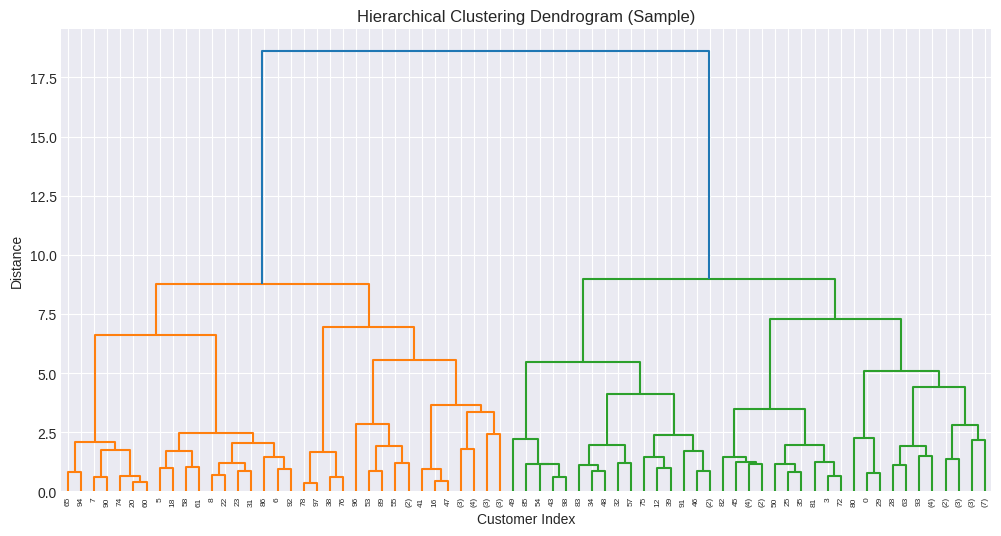


Similarity between K-Means and Hierarchical Clustering: 0.646
(1.0 = identical, 0.0 = random)


In [ ]:
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix
# Sample data for dendrogram (full dataset would be too large to visualize)
sample_indices = np.random.choice(len(X_scaled), size=min(100, len(X_scaled)), replace=False)
X_sample = X_scaled[sample_indices]

# Perform hierarchical clustering
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=6)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering on full dataset
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Compare with K-Means
from sklearn.metrics import adjusted_rand_score
similarity = adjusted_rand_score(clusters, agg_clusters)
print(f"\nSimilarity between K-Means and Hierarchical Clustering: {similarity:.3f}")
print("(1.0 = identical, 0.0 = random)")

## 5. Market Basket Analysis with Apriori Algorithm <a id='market-basket'></a>

**Market Basket Analysis** discovers associations between products that are frequently purchased together.

### Key Concepts:
- **Support**: Fraction of transactions containing the itemset
- **Confidence**: Probability of buying Y given that X was bought
- **Lift**: How much more likely Y is purchased when X is purchased

In [28]:
# Prepare data for market basket analysis
# Group products by invoice
basket = df_clean.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary (0/1) matrix
# 1 = product was purchased, 0 = product was not purchased
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

print(f"Transaction matrix shape: {basket_sets.shape}")
print(f"Number of transactions: {basket_sets.shape[0]}")
print(f"Number of unique products: {basket_sets.shape[1]}")

# Show sample transactions
print("\nSample transaction matrix (first 5 transactions, first 5 products):")
print(basket_sets.iloc[:5, :5])

Transaction matrix shape: (43769, 11)
Number of transactions: 43769
Number of unique products: 11

Sample transaction matrix (first 5 transactions, first 5 products):
Description  Backpack  Blue Pen  Desk Lamp  Headphones  Notebook
InvoiceNo                                                       
100005              0         0          0           0         1
100015              0         0          0           0         0
100037              0         0          0           0         1
100056              0         0          0           0         0
100059              0         0          1           0         0


In [30]:
# Apply the Apriori algorithm to find frequently purchased product combinations
# min_support: Minimum proportion of transactions in which the itemset must appear
# For example, min_support = 0.005 means we only keep itemsets bought in at least 0.5% of all transactions
min_support = 0.0001

print(f" Running Apriori to find frequent itemsets (support ≥ {min_support*100:.2f}% of transactions)...")

# Generate frequent itemsets with their support values
frequent_itemsets = apriori(basket_sets,
                            min_support=min_support,
                            use_colnames=True)  # Use actual product names instead of column indices

print(f"\n Found {len(frequent_itemsets)} frequent itemsets that meet the support threshold.")

# Display the top 10 most common item combinations
print("\n Top 10 most frequent itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

 Running Apriori to find frequent itemsets (support ≥ 0.01% of transactions)...

 Found 66 frequent itemsets that meet the support threshold.

 Top 10 most frequent itemsets:
    support        itemsets
8  0.094770    (Wall Clock)
7  0.094199     (USB Cable)
0  0.094131      (Backpack)
2  0.093651     (Desk Lamp)
9  0.093240     (White Mug)
5  0.092600  (Office Chair)
3  0.092577    (Headphones)
6  0.092417       (T-shirt)
1  0.092029      (Blue Pen)
4  0.091595      (Notebook)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
# Generate association rules
min_confidence = 0.0025

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print(f"Generated {len(rules)} association rules")

# Add additional metrics
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))

# Display top rules by lift
print("\nTop 10 Association Rules by Lift:")
top_rules = rules.sort_values('lift', ascending=False).head(10)
print(top_rules)

Generated 105 association rules

Top 10 Association Rules by Lift:
       antecedents     consequents  antecedent support  consequent support  \
40  (Office Chair)     (Desk Lamp)            0.092600            0.093651   
41     (Desk Lamp)  (Office Chair)            0.093651            0.092600   
24      (Notebook)      (Blue Pen)            0.091595            0.092029   
25      (Blue Pen)      (Notebook)            0.092029            0.091595   
67       (T-shirt)      (Notebook)            0.092417            0.091595   
66      (Notebook)       (T-shirt)            0.091595            0.092417   
60     (White Mug)    (Headphones)            0.093240            0.092577   
61    (Headphones)     (White Mug)            0.092577            0.093240   
59    (Headphones)    (Wall Clock)            0.092577            0.094770   
58    (Wall Clock)    (Headphones)            0.094770            0.092577   

     support  confidence      lift  representativity  leverage  conviction

### Visualize Association Rules

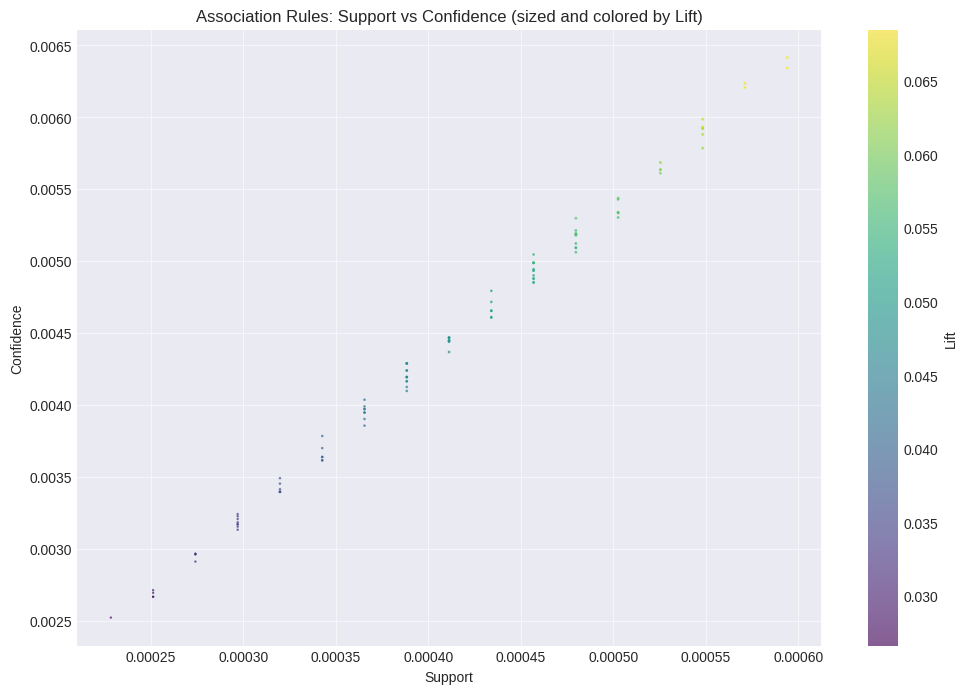


High-quality rules (Lift > 2, Confidence > 50%): 0


In [34]:
# Create scatter plot of rules
if not rules.empty:
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(rules['support'], rules['confidence'],
                         c=rules['lift'], s=rules['lift']*20,
                         alpha=0.6, cmap='viridis')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules: Support vs Confidence (sized and colored by Lift)')
    plt.colorbar(scatter, label='Lift')
    plt.grid(True, alpha=0.6)
    plt.show()

    # Filter high-quality rules
    high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
    print(f"\nHigh-quality rules (Lift > 2, Confidence > 50%): {len(high_quality_rules)}")
else:
    print("\nNo association rules found to visualize with the current thresholds.")
    print("Consider adjusting min_support and min_confidence in the previous cells.")

### Product Recommendation Engine

In [35]:
def get_recommendations(product, rules_df, max_recommendations=10):
    """
    Get product recommendations based on association rules
    """
    # Find rules where the product is in the antecedent
    relevant_rules = rules_df[rules_df['antecedents'].apply(lambda x: product in x)]

    if len(relevant_rules) == 0:
        return "No recommendations found for this product."

    # Sort by lift and get top recommendations
    relevant_rules = relevant_rules.sort_values('lift', ascending=False).head(max_recommendations)

    recommendations = []
    for idx, rule in relevant_rules.iterrows():
        consequent = ', '.join(list(rule['consequents']))
        recommendations.append({
            'Product': consequent,
            'Confidence': f"{rule['confidence']:.1%}",
            'Lift': f"{rule['lift']:.2f}"
        })

    return pd.DataFrame(recommendations)

# Test the recommendation engine
# Find popular products to test
popular_products = df_clean['Description'].value_counts().head(20).index.tolist()

print("Product Recommendation Engine Demo")
print("=" * 50)
test_product = popular_products[0]
print(f"\nRecommendations for: {test_product}")
print(get_recommendations(test_product, rules))

Product Recommendation Engine Demo

Recommendations for: Wall Clock
        Product Confidence  Lift
0    Headphones       0.6%  0.06
1      Backpack       0.5%  0.06
2       T-shirt       0.5%  0.05
3      Notebook       0.4%  0.04
4      Blue Pen       0.4%  0.04
5  Office Chair       0.4%  0.04
6     USB Cable       0.4%  0.04
7     White Mug       0.3%  0.03


## 6. Business Insights and Recommendations <a id='insights'></a>

Let's synthesize our findings into actionable business recommendations.

In [36]:
# Combine cluster analysis with purchase patterns
# Add cluster information to original transaction data
df_with_clusters = df_clean.merge(rfm_clean[['CustomerID', 'Cluster']], on='CustomerID')

# Analyze product preferences by cluster
cluster_products = df_with_clusters.groupby(['Cluster', 'Description'])['Quantity'].sum().reset_index()
cluster_products = cluster_products.sort_values(['Cluster', 'Quantity'], ascending=[True, False])

# Top 5 products per cluster
print("TOP 5 PRODUCTS BY CUSTOMER SEGMENT")
print("=" * 50)
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} - {personas[cluster]['name']}:")
    top_products = cluster_products[cluster_products['Cluster'] == cluster].head(10)
    for idx, row in top_products.iterrows():
        print(f"  - {row['Description']}: {row['Quantity']} units")

TOP 5 PRODUCTS BY CUSTOMER SEGMENT

Cluster 0 - High-Value, Recent Buyers:
  - White Mug: 27397 units
  - Wireless Mouse: 26559 units
  - Wall Clock: 25419 units
  - Headphones: 25219 units
  - Blue Pen: 25132 units
  - USB Cable: 25095 units
  - Office Chair: 24894 units
  - T-shirt: 24840 units
  - Notebook: 24610 units
  - Desk Lamp: 24488 units

Cluster 1 - At Risk, Low Engagement:
  - USB Cable: 29994 units
  - Office Chair: 29879 units
  - T-shirt: 29843 units
  - Backpack: 29257 units
  - Desk Lamp: 28862 units
  - Wall Clock: 28494 units
  - Headphones: 27781 units
  - Wireless Mouse: 27756 units
  - White Mug: 27333 units
  - Blue Pen: 27293 units


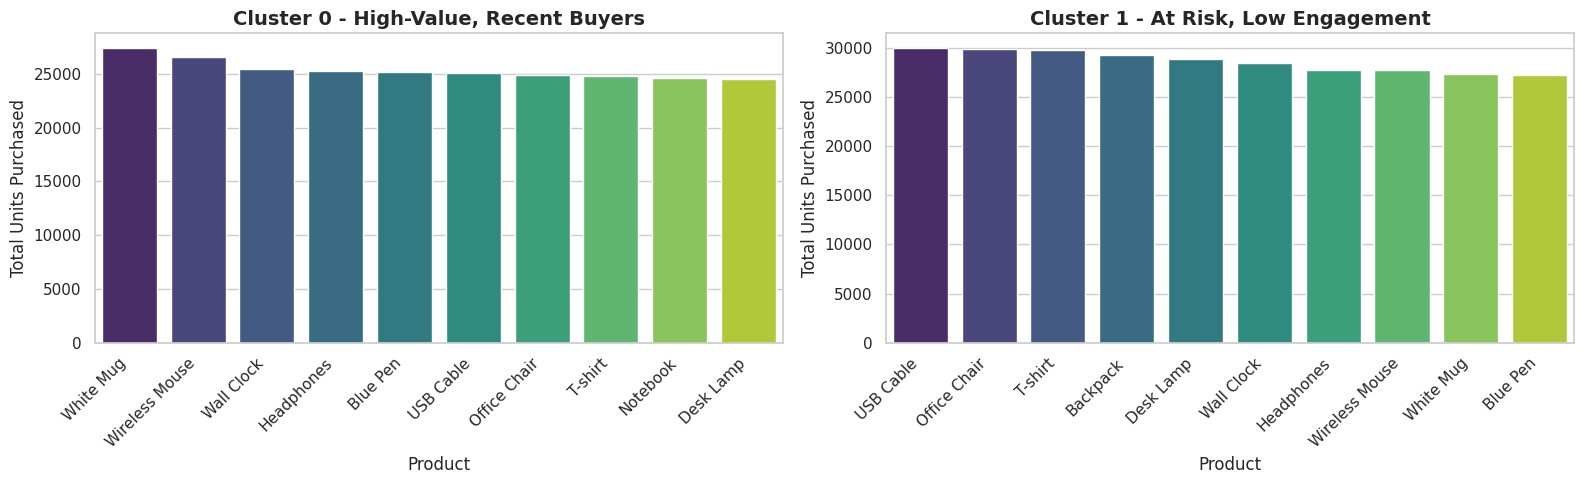

In [38]:
# Visualize purchase pattern by clusters
# Settings
import math
sns.set(style="whitegrid")
cols = 2  # number of plots per row
rows = math.ceil(optimal_k / cols)  # auto-calculate needed rows

plt.figure(figsize=(16, 5 * rows))

for cluster in range(optimal_k):
    # Top 5 products for the cluster
    top_products = (
        cluster_products[cluster_products['Cluster'] == cluster]
        .nlargest(10, 'Quantity')
    )

    # Position in subplot grid
    plt.subplot(rows, cols, cluster + 1)
    sns.barplot(
        data=top_products,
        x='Description',
        y='Quantity',
        palette='viridis'
    )
    plt.title(f"Cluster {cluster} - {personas[cluster]['name']}",
              fontsize=14, fontweight='bold')
    plt.xlabel("Product")
    plt.ylabel("Total Units Purchased")
    plt.xticks(rotation=45, ha='right')  # rotate labels for readability

plt.tight_layout()
plt.show()



In [39]:
print("\nBUSINESS RECOMMENDATIONS")
print("=" * 70)

for cluster_id, persona in personas.items():
    print(f"\n{persona['name']} (Cluster {cluster_id})")
    print("-" * 50)

    metrics = persona['metrics']

    if metrics['Recency'] < 50 and metrics['Frequency'] > 15:
        print("RETAIN: Loyal, high-frequency customers who purchase often and recently.")
        print("  - Offer exclusive membership or VIP programs")
        print("  - Provide early access to product launches or special sales")
        print("  - Send personalized appreciation messages and rewards")
        print("  - Maintain high-touch customer service to strengthen loyalty")

    elif metrics['Recency'] > 150 and metrics['Monetary'] > 1000:
        print("RE-ENGAGE: High-spending customers who have not purchased recently.")
        print("  - Launch win-back campaigns with personalized offers")
        print("  - Recommend products based on their past purchase history")
        print("  - Provide time-sensitive discounts to create urgency")
        print("  - Reach out with surveys to understand barriers to re-purchase")

    elif metrics['Frequency'] < 5:
        print("DEVELOP: New or low-engagement customers who need nurturing.")
        print("  - Send welcome or onboarding email sequences")
        print("  - Offer first-purchase discounts or bundles")
        print("  - Highlight best-sellers and highly-rated products")
        print("  - Share tips, guides, or educational content to build trust")

    else:
        print("GROW: Mid-tier customers with strong growth potential.")
        print("  - Promote complementary or related products to increase basket size")
        print("  - Introduce loyalty or reward programs")
        print("  - Send targeted recommendations based on browsing or purchase data")
        print("  - Offer exclusive deals to encourage repeat purchases")

    # ROI Projections
    avg_value = metrics['Monetary'] / metrics['Frequency'] if metrics['Frequency'] > 0 else 0
    potential_revenue = persona['size'] * avg_value * 0.25  # Aim for a 25% response rate
    print(f"\n  Potential Revenue Impact: ${potential_revenue:,.0f}")



BUSINESS RECOMMENDATIONS

High-Value, Recent Buyers (Cluster 0)
--------------------------------------------------
RE-ENGAGE: High-spending customers who have not purchased recently.
  - Launch win-back campaigns with personalized offers
  - Recommend products based on their past purchase history
  - Provide time-sensitive discounts to create urgency
  - Reach out with surveys to understand barriers to re-purchase

  Potential Revenue Impact: $4,949,011

At Risk, Low Engagement (Cluster 1)
--------------------------------------------------
DEVELOP: New or low-engagement customers who need nurturing.
  - Send welcome or onboarding email sequences
  - Offer first-purchase discounts or bundles
  - Highlight best-sellers and highly-rated products
  - Share tips, guides, or educational content to build trust

  Potential Revenue Impact: $2,241,851


In [40]:
# basket_df: rows=transactions, columns=Description (1/0)
basket_sizes = basket_sets.sum(axis=1)
basket_df_multi = basket_sets[basket_sizes >= 2]
print("Multi-item share:", len(basket_df_multi)/len(basket_sets))

Multi-item share: 0.02136215129429505


In [46]:
def top_pairs(basket_df: pd.DataFrame) -> pd.DataFrame:
    # ensure binary ints (in case you have floats/bools)
    X = (basket_df > 0).astype(int)

    # co-occurrence counts
    co = X.T.dot(X)

    # drop self-pairs on the diagonal
    np.fill_diagonal(co.values, 0)

    # give distinct axis names so reset_index won’t collide
    co.index.name = "A"
    co.columns.name = "B"

    # long form: A, B, count_ab
    pairs = (
        co.stack()                      # MultiIndex (A,B) -> Series
          .rename_axis(["A", "B"])      # explicit names
          .reset_index(name="count_ab") # turn into DataFrame
    )

    # keep only unordered pairs once (A < B lexicographically)
    pairs = pairs[pairs["A"] < pairs["B"]].reset_index(drop=True)

    # individual supports
    item_counts = X.sum(axis=0)
    n_tx = len(X)

    pairs["count_a"] = pairs["A"].map(item_counts)
    pairs["count_b"] = pairs["B"].map(item_counts)

    pairs["support"]  = pairs["count_ab"] / n_tx
    denom = (pairs["count_a"] + pairs["count_b"] - pairs["count_ab"]).replace(0, np.nan)
    pairs["jaccard"] = pairs["count_ab"] / denom
    pairs["jaccard"] = pairs["jaccard"].fillna(0)

    return pairs.sort_values("support", ascending=False)

def print_pair_recommendations(pairs, topn=10, min_p=0.03, min_j=0.05):
    print("\n\nCROSS-SELLING OPPORTUNITIES")
    print("=" * 75)

    shown = 0
    for _, r in pairs.iterrows():
        p_b_given_a = r["count_ab"] / r["count_a"] if r["count_a"] else 0.0
        p_a_given_b = r["count_ab"] / r["count_b"] if r["count_b"] else 0.0

        if (r["jaccard"] < min_j) and (max(p_b_given_a, p_a_given_b) < min_p):
            continue

        if p_b_given_a >= p_a_given_b:
            buy, rec, conf = r["A"], r["B"], p_b_given_a
        else:
            buy, rec, conf = r["B"], r["A"], p_a_given_b

        shown += 1
        print(f"\n{shown}. When customers buy '{buy}', recommend '{rec}'")
        print(f"   Co-occurrence: {r['support']:.2%} of all baskets  |  Jaccard: {r['jaccard']:.2f}")
        print(f"   Conversion proxy P({rec}|{buy}) ≈ {conf:.1%}  (based on {int(r['count_ab'])} joint purchases)")
        print("-" * 60)
        if shown >= topn:
            break

    if shown == 0:
        print("No strong pairs under current thresholds. Try lowering min_p or min_j.")

   # Use your computed pairs DataFrame
pairs = top_pairs(basket_df_multi)
print_pair_recommendations(pairs, topn=10)




CROSS-SELLING OPPORTUNITIES

1. When customers buy 'Office Chair', recommend 'Desk Lamp'
   Co-occurrence: 2.78% of all baskets  |  Jaccard: 0.08
   Conversion proxy P(Desk Lamp|Office Chair) ≈ 15.3%  (based on 26 joint purchases)
------------------------------------------------------------

2. When customers buy 'Blue Pen', recommend 'Notebook'
   Co-occurrence: 2.67% of all baskets  |  Jaccard: 0.08
   Conversion proxy P(Notebook|Blue Pen) ≈ 14.9%  (based on 25 joint purchases)
------------------------------------------------------------

3. When customers buy 'Headphones', recommend 'White Mug'
   Co-occurrence: 2.57% of all baskets  |  Jaccard: 0.07
   Conversion proxy P(White Mug|Headphones) ≈ 13.4%  (based on 24 joint purchases)
------------------------------------------------------------

4. When customers buy 'Notebook', recommend 'T-shirt'
   Co-occurrence: 2.57% of all baskets  |  Jaccard: 0.07
   Conversion proxy P(T-shirt|Notebook) ≈ 13.2%  (based on 24 joint purchases)
-

Saving results for Streamlit Dashboard

In [49]:
import joblib, json

# Save results for future use
print("\nSaving analysis results...")

# Save cluster assignments
rfm_clean.to_csv('segmented_customers.csv', index=False)
print("Customer segments saved to 'segmented_customers.csv'")

# Save association rules
rules.to_csv('association_rules.csv', index=False)
print("Association rules saved to 'association_rules.csv'")

# Save cluster profiles
cluster_profiles.to_csv('cluster_profiles.csv')
print("Cluster profiles saved to 'cluster_profiles.csv'")

# Save models
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")


# Save feature order + k for validation later
meta = {"clustering_features": clustering_features, "optimal_k": int(optimal_k)}
with open("model_meta.json", "w") as f:
    json.dump(meta, f)

# Save PCA + meta (variance explained for labels)
joblib.dump(pca, "pca.pkl")
meta = {
    "pca_explained": pca.explained_variance_ratio_.tolist(),
    "total_explained": float(pca.explained_variance_ratio_.sum())
}
with open("pca_meta.json", "w") as f:
    json.dump(meta, f)

def json_default(o):
    if isinstance(o, (np.integer,)):   return int(o)
    if isinstance(o, (np.floating,)):  return float(o)
    if isinstance(o, (np.bool_,)):     return bool(o)
    if isinstance(o, (set, frozenset)):return sorted(map(str, o))
    if isinstance(o, np.ndarray):      return o.tolist()
    if isinstance(o, pd.Timestamp):    return o.isoformat()
    # Fallback: stringify anything odd
    return str(o)

with open("personas.json", "w", encoding="utf-8") as f:
    json.dump(personas, f, default=json_default, ensure_ascii=False, indent=2)
print("personas.json saved")

stats = {
    "multi_item_share": float(len(basket_df_multi) / len(basket_sets)),
    "avg_basket_size":  float(basket_sets.sum(axis=1).mean()),
}
with open("basket_stats.json", "w", encoding="utf-8") as f:
    json.dump(stats, f, default=json_default, ensure_ascii=False, indent=2)
print("basket_stats.json saved")

pairs = pairs.copy()
for c in ["support","jaccard","count_ab","count_a","count_b"]:
    if c in pairs.columns:
        pairs[c] = pd.to_numeric(pairs[c], errors="coerce")
pairs.to_csv("pairs.csv", index=False)
print(" pairs.csv saved")

cluster_centers_df.to_csv("cluster_centers_from_training.csv", index=False)

joblib.dump(basket_sets, "basket_sets.pkl")

frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)
joblib.dump(frequent_itemsets, "frequent_itemsets.pkl")

print("\nAnalysis complete! Results have been saved for deployment.")


Saving analysis results...
Customer segments saved to 'segmented_customers.csv'
Association rules saved to 'association_rules.csv'
Cluster profiles saved to 'cluster_profiles.csv'
personas.json saved
basket_stats.json saved
 pairs.csv saved

Analysis complete! Results have been saved for deployment.
